In [ ]:
!pip install tweet-preprocessor
!pip install pandas --upgrade
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

     |████████████████████████████████| 11.3 MB 5.4 MB/s 
ERROR: Operation cancelled by user
--2021-12-19 09:06:23--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2021-12-19 09:06:24 (47.4 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2021-12-19 09:06:24--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 5.4 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ As of spaCy v3.0, shortcuts like 'xx' are deprecated. Please use the
full pipeline package name 'xx_ent_wiki_sm' instead.
     |████████████████████████████████| 11.8 MB 4.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[nltk

In [ ]:
#Import modul-modul yang akan digunakan
import taudataDDGsna as taudata
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import graphviz
import time, numpy as np
import random, taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph
import pandas as pd
import preprocessor as p
import re
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

seed = 123
random.seed(seed)
np.random.seed(seed)
"Done"

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


'Done'

In [ ]:
#Menyambungkan server twitter dengan API key
Ck = "38ENsyfktm5JwICMfsOJFacMZ" #API key
Cs = "C04o8CV1dxtO7AgeFgdRm6AUHMfjX3XFodT4XPvvXw7eeObqXd" #API secret
At = "1382895635922255874-PtEqDmT84Jq8LdPfyT375WhHDrA7PE" #Access Token
As = "m6CJ106SF66qR9w0kvJRK69nbEABHd6xW8Wp7aCjVn0QP" #Access Secret

In [ ]:
#Menyambungkan server twitter dengan API key
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "Daniel C" you are now connected to twitter server


In [ ]:
#Crawling data twitter dengan kata kunci 'vaksin'
qry = 'vaksin'
N = 20000 #jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

AttributeError: ignored

In [ ]:
#Mengecek berapa banyak data yang didapatkan
tweets = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweets)))

In [ ]:
tweets[0]['created_at'], tweets[0]['full_text']

In [ ]:
#Menyimpan data hasil crawling ke bentuk JSON
fileName = 'TweetsVaksin_Datmin_2021.json'
saveTweets(tweets, file=fileName)
print('Saved to '+fileName)

In [ ]:
#Normalize data crawling
df = pd.json_normalize(tweets)
print(df.head())

In [ ]:
#Memilih data hanya di kolom 'user.name' dan 'full_text'
dftweet = df[['user.name', 'full_text']]
print(dftweet.head())

In [ ]:
#Data diubah ke bentuk Excel
dftweet.to_excel('TweetsVaksinFiltered.xlsx')

# Load data crawling

In [ ]:
#Load data yang sudah dianalisa dengan format csv
data_tweet=pd.read_csv("Data Frame 1.csv")      #  Data Frame 1

In [ ]:
data_tweet.info()

In [ ]:
#hilangkan kolom-kolom yang tidak digunakan
data_tweet = data_tweet.drop('Unnamed: 0',axis=1)
data_tweet = data_tweet.drop('Unnamed: 1',axis=1)
data_tweet = data_tweet.drop('Unnamed: 5',axis=1)
data_tweet = data_tweet.drop('Unnamed: 6',axis=1)

In [ ]:
data_tweet.info()

# Preprocessing

Persiapan Preprocessing

In [ ]:
#meload dan join stopword id, en, dan stopwords manual
stopwords_en = open('/content/data/stopwords_en.txt', 'r')
stopwords_en = [line.rstrip('\n') for line in stopwords_en]
stopwords_id = open('/content/data/stopwords_id.txt', 'r')
stopwords_id = [line.rstrip('\n') for line in stopwords_id]
stopwords=pd.read_excel('Data Frame 2.xlsx',index_col=None)    # Data Frame 2
stopwords=stopwords.values.tolist()
stopwords=[word[1] for word in stopwords]
stopwordstambahan=['ternyata','soal','bahkan','tetap','termasuk','berapa','keadaan','belakangan','pandemik','menuju','sebagian',
                   'terbiasa','home','mcm','kahwin','comeback','banget','x','jumpa','husband','update','ortu','abroad','lot',
                   'persiapan','man','ttp','sedang','stay','eeee','ngak','ki','eits','ehe','emank','bngett','brotherrrr','masyrakat','masyarakatnya',
                   'xle','xda','t','xde','xdpt','xd','kat',"beliau",'dimna','wes','lho','ra','yaa','ya','y','x','slama','mmg','sllu','sj','luwih','krea','vaksin',
                   'jerman','traktor','gpp',"silakan","bolehkan","bolekan",'vaksinasi','gusti','divaksin','iya','sumandogaek',"dsuperboy","redzuannewsmpb",'feb','vaksinasi',
                   "zifivax","zifivax'",'vak','uea','vaksi','va','masyarakat',"klinis'",'segi', "'", '...','menda',"'anhui",'unit','longcom',"zhifei'","'penggalak",'kekalkan','berusia',
                   'penggalak','terkini','ambil','individu','abah','ditukarkan','peralata','jumatberkah','follow','pickaw','malaysia','saldo','rakyat','negara','balas','desember','melaksanakan',
                   'mendagri','jakarta','resor','pt','kenyataan','pengambilan','program','pesawat','kartu','karakter','tokoh','aceh',"penerima'",
                   'varian', 'kipi','uncle','agree','bagamana','ln','tru','mela','adekuat','melepak','ono','ngene','iki','piyeh','nek',
                   'dnge','loka','anhui','zhifei','hunan','jbio','cdc','budi','erick','thohir','kittens','furever','bob','tail','boli','ovujxbiyf','maria','subjek','justeru',
                   'banggain','natal','dapat','periode','antarkota','sert','pc','tanggal','gunadi','sadikin','scan','rekomb','kes','eropa','pekan','partially','maksudnya','brharap','sgr','subyek','diluar','siti','nyedisin','sistim','terawan',"penerima'",'penyunti']
stopwords_all=stopwords_en+stopwords_id+stopwords+stopwordstambahan
#cek apakah sudah tergabung
len(stopwords_all)==len(stopwords_en)+len(stopwords_id)+len(stopwords)+len(stopwordstambahan)

In [ ]:
#meload dictionary slang
with open('/content/data/slang.dic') as f:
    data = f.read()
dictionary = json.loads(data)

In [ ]:
#meload sastrawi stemmer
factory = StemmerFactory()
stemmerid = factory.create_stemmer()

In [ ]:
#preprocessing data dengan mengganti type-type data yang kurang sesuai
data_tweet['user.name']=data_tweet['user.name'].astype('string')
data_tweet['full_text']=data_tweet['full_text'].astype('string')
data_tweet['Sentimen']=data_tweet['Sentimen'].astype('category')
data_tweet.info()
print(data_tweet.head())

In [ ]:
data_tweet['full_text'].dropna(axis=0,how="any")

In [ ]:
#melakukan case folding agar uniform
data_tweet['full_text']=data_tweet['full_text'].str.lower()

#membuat fungsi membakukan kata non-formal
def correctslang(text):
  text_list=text.split()
  newlist=[]
  for tweet in text_list:
    if tweet in dictionary.keys():
      tweetbaru=tweet.replace(tweet,dictionary[tweet])
      newlist.append(tweetbaru)
    else:
      tweetbaru=tweet
      newlist.append(tweetbaru)
  text=' '.join(newlist)
  return text
data_tweet['clean_tweet']=data_tweet['full_text'].apply(correctslang)

#membuat fungsi membersihkan angka
def cleaning(text):
  text = re.sub(r"@[A-Za-z0-9]+","",text)
  text = re.sub(r'\W+',' ', text)
  text = re.sub(r'[\s]+',' ',text)
  text = re.sub(r"http\S+", " ",text)
  word_list = text.split()
  tweet = ' '.join(word_list)
  return tweet
data_tweet['cleaner_tweet']=data_tweet['clean_tweet'].apply(cleaning)
print(data_tweet['cleaner_tweet'])

In [ ]:
#menghilangkan hashtag, mention, emoji dari tweets
clean_tweet=[]
for tweet in data_tweet['cleaner_tweet']:
  clean_tweet.append(p.clean(tweet))
data_tweet['cleanest_tweet']=clean_tweet

In [ ]:
print(data_tweet['cleanest_tweet'])

In [ ]:
#tokenisasi
word_tokens=[word_tokenize(tweet) for tweet in data_tweet['cleanest_tweet']]
#membersihkan kata dari stopwords yang sudah dibuat dan memasukkan tweet bersih ke dalam dataframe
filter = [[word for word in item if word not in stopwords_all and word.isalpha()]for item in word_tokens]
tweetbersih=[]
for i in range(len(filter)):
  text=' '.join(set(filter[i]))
  tweetbersih.append(text)
data_tweet['without_stopwords_tweet']=tweetbersih

#stemming
stemmed = []
for tweet in tweetbersih:
  tweet=stemmerid.stem(tweet)
  stemmed.append(tweet)
data_tweet['final_tweet']=stemmed
print(data_tweet['final_tweet'])

In [ ]:
#menunjukkan data bersih
print(data_tweet['final_tweet'].head())

# Visualisasi dan Wordcloud


In [ ]:
visualisasi_data = data_tweet.groupby('Sentimen').count()
print(visualisasi_data)

In [ ]:
visualisasi_data.reset_index(inplace=True)
sns.barplot(x='Sentimen', y='final_tweet', data=visualisasi_data, palette="pastel")
plt.ylabel("Jumlah tweet")
plt.show()

In [ ]:
#pisahkan data bersentimen negatif, netral, dan positif
data_negatif = data_tweet[data_tweet["Sentimen"]==-1]
data_netral = data_tweet[data_tweet["Sentimen"]==0]
data_positif = data_tweet[data_tweet["Sentimen"]==1]

In [ ]:
#membuat wordcloud negatif dengan parameter collocations=False agar kata tidak berulang
# WordCLoud Negatif
faktor_negatif = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False).generate(' '.join(data_negatif['final_tweet']))
plt.imshow(faktor_negatif,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# WordCLoud netral
faktor_netral = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False).generate(' '.join(data_netral['final_tweet']))
plt.imshow(faktor_netral)
plt.axis('off')
plt.show()

In [ ]:
# WordCLoud positif
faktor_positif = WordCloud(width = 1000, height = 800,
                background_color ='white',
                min_font_size = 10,collocations=False).generate(' '.join(data_positif['final_tweet']))
plt.imshow(faktor_positif,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip3 uninstall openpyxl
!pip3 install openpyxl 

Found existing installation: openpyxl 2.5.9
Uninstalling openpyxl-2.5.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-2.5.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-2.5.9
     |████████████████████████████████| 242 kB 5.3 MB/s 


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_excel('Data Frame 3.xlsx')        # dataframe 3
df_test = pd.read_excel('Data Frame 4.xlsx')          # dataframe 4

print(df_train.shape)
print(df_test.shape)

(13401, 4)
(6599, 4)


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train.tail()

,no,user.name,full_text,Sentimen
13396,13396,cikzaa ♡,RT @redzuanNewsMPB: TERKINI\nSemua penerima va...,0
13397,13397,Buzzlightyear,RT @Jelajah86_: Mendagri ajak semua pihak duku...,1
13398,13398,Rahah Ghazali 🇲🇾🏴🏴🏴🏴,RT @redzuanNewsMPB: TERKINI\nSemua penerima va...,0
13399,13399,Buzzlightyear,RT @KerenKotaku: Mendagri ajak semua pihak duk...,1
13400,13400,Zulaikha,@ApunkSOF @riskullahmakmur @me_araya_ Terdapat...,-1


In [ ]:
df_test.tail()

,No,user.name,full_text,Sentimen
6594,19995,ifanovna,bisa2nya pake vaksin doang sombong,-1
6595,19996,Krueger,RT @Belok_dong: 4. Vaksin Zifivax sdh diuji kl...,1
6596,19997,𝑺𝒂𝒊 𝑵𝒂𝒊,RT @mikhaylakumala: 4. Vaksin Zifivax sudah di...,1
6597,19998,Krueger,RT @Belok_dong: 5. Zifivax merupakan vaksin yg...,1
6598,19999,♚⇨A.R.I.R.A™⇦♚,RT @redzuanNewsMPB: TERKINI\nSemua penerima va...,0


In [ ]:
# Mengumpulkan Hashtag

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
import re
# Extract hashtag dari sentimen netral
HT_netral = hashtag_extract(df_train['full_text'][df_train['Sentimen'] == 0])

# Extract hashtag dari sentimen positif
HT_positive = hashtag_extract(df_train['full_text'][df_train['Sentimen'] == 1])

# Extract hashtag dari sentimen negatif
HT_negative = hashtag_extract(df_train['full_text'][df_train['Sentimen'] == -1])

# unnesting list
HT_netral = sum(HT_netral, [])
HT_positive = sum(HT_positive, [])
HT_negative = sum(HT_negative, [])

In [ ]:
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

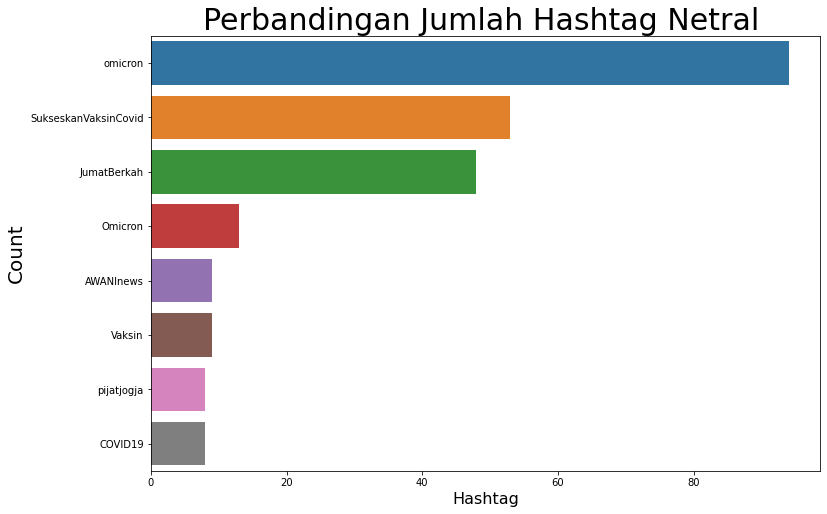

In [ ]:
a = nltk.FreqDist(HT_netral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# memilih 8 hashtag tersering dipakai di sentimen netral      
d = d.nlargest(columns="Count", n = 8) 
plt.figure(figsize=(12,8))
ax = sns.barplot(data=d, x= "Count", y = "Hashtag", ) 
plt.xlabel("Hashtag", fontsize = 16)
plt.ylabel("Count", fontsize = 20)
ax.set_title('Perbandingan Jumlah Hashtag Netral ', fontsize = 30)
plt.show()

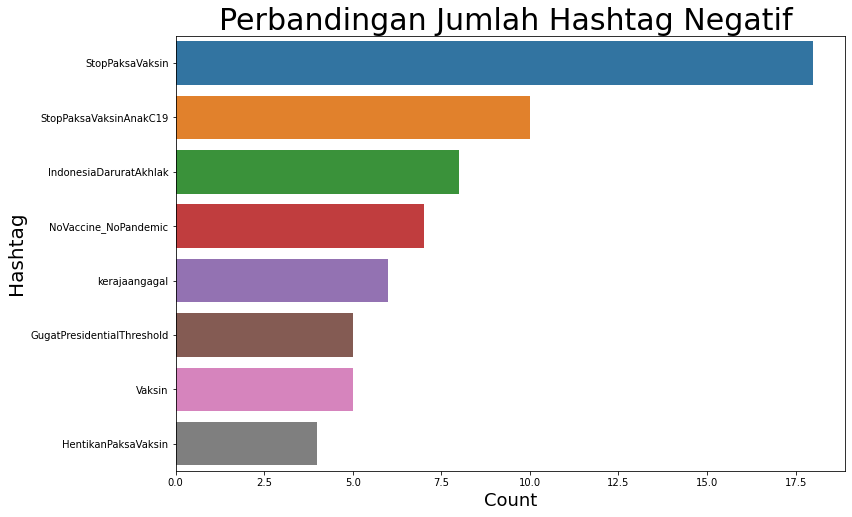

In [ ]:
aa = nltk.FreqDist(HT_negative)
dd = pd.DataFrame({'Hashtag': list(aa.keys()),
                  'Count': list(aa.values())})

# memilih 8 hashtag tersering dipakai di sentimen negatif
dd = dd.nlargest(columns="Count", n = 8) 
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dd, x= "Count" , y = "Hashtag")
plt.xlabel("Count", fontsize = 18)
plt.ylabel("Hashtag", fontsize = 20)
ax.set_title('Perbandingan Jumlah Hashtag Negatif ', fontsize = 30)
plt.show()

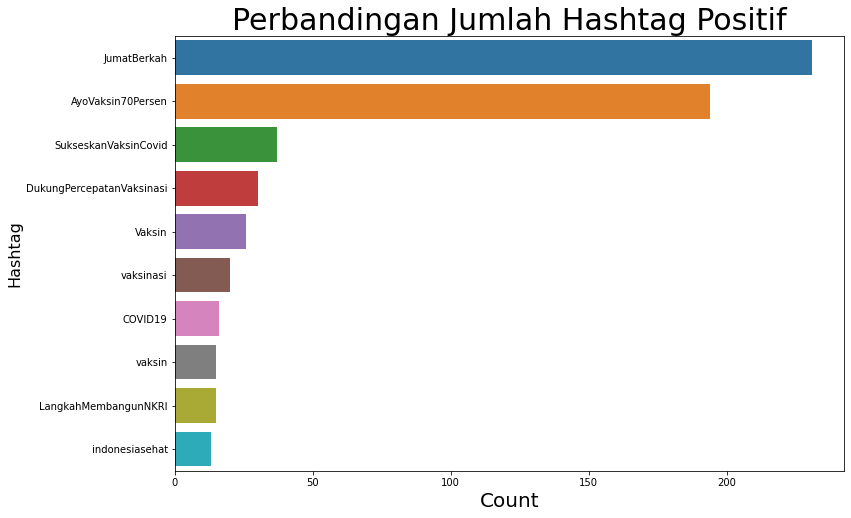

In [ ]:
aaa = nltk.FreqDist(HT_positive)
ddd = pd.DataFrame({'Hashtag': list(aaa.keys()),
                  'Count': list(aaa.values())})

# memilih 8 hashtag tersering dipakai di sentimen positif  
ddd = ddd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(12,8))
ax = sns.barplot(data=ddd, x= "Count" , y = "Hashtag")
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Hashtag", fontsize = 16 )
ax.set_title('Perbandingan Jumlah Hashtag Positif', fontsize = 30)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#import dataframe 4 untuk visualisasi
table3 = pd.read_excel('Data Frame 5.xlsx')   # data frame 5
print(table3.shape)

(20000, 7)


In [ ]:
table3.head()

,Unnamed: 0,Day,Date,Unnamed: 3,user.name,full_text,Sentimen
0,0,Jumat,17-Dec-2021,7,Antok1,RT @pakne_sarah: Jika satu sekolah kompak tola...,-1
1,1,Jumat,17-Dec-2021,7,Dhesii✨,RT @airman673: PERTANYAAN : BOLEHKAN KITA MEMB...,-1
2,2,Jumat,17-Dec-2021,7,ᴛʜᴇ ᴇᴅɢᴇ,RT @mikhaylakumala: 3. Dari segi keamanan Vaks...,1
3,3,Jumat,17-Dec-2021,7,ᴛʜᴇ ᴇᴅɢᴇ,RT @mikhaylakumala: 2. Selain di nilai ampuh s...,1
4,4,Jumat,17-Dec-2021,7,ᴛʜᴇ ᴇᴅɢᴇ,RT @mikhaylakumala: Vaksin Zifivax Cegah Covid...,1


Text(0, 0.5, 'Jumlah')

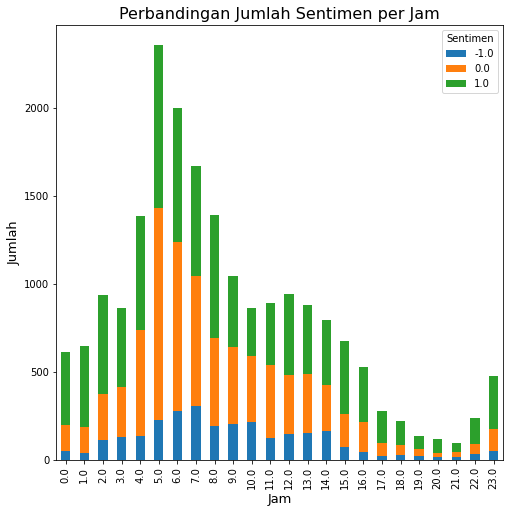

In [ ]:
# Visualisasi perbandungan Jumlah Sentimen per Jam
CT = pd.crosstab(index=table3["Time"], columns=table3["Sentimen"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)
plt.title("Perbandingan Jumlah Sentimen per Jam", fontsize = 16)
plt.xlabel("Jam", fontsize=13)
plt.ylabel("Jumlah", fontsize = 13)

Text(0, 0.5, 'Jumlah')

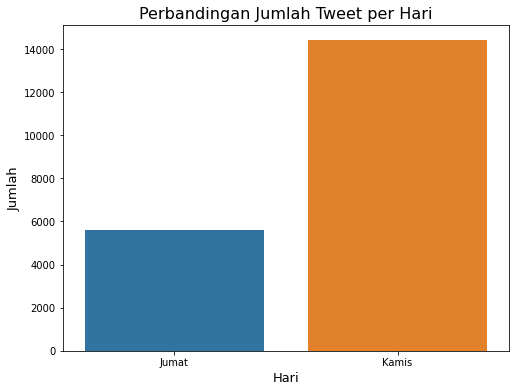

In [ ]:
# Visualisasi perbandungan Jumlah Tweet per Hari
plt.figure(figsize=(8,6)) 
p = sns.countplot(x="Day", data=table3)
plt.title("Perbandingan Jumlah Tweet per Hari", fontsize = 16)
plt.xlabel("Hari", fontsize=13)
plt.ylabel("Jumlah", fontsize = 13)


Text(0, 0.5, 'Jumlah')

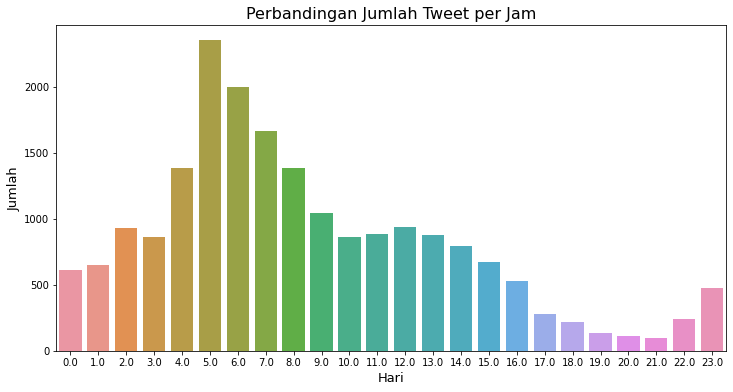

In [ ]:
# Visualisasi perbandungan Jumlah Tweet per Jam
plt.figure(figsize=(12,6)) 
p = sns.countplot(x="Time", data=table3)
plt.title("Perbandingan Jumlah Tweet per Jam", fontsize = 16)
plt.xlabel("Hari", fontsize=13)
plt.ylabel("Jumlah", fontsize = 13)

No handles with labels found to put in legend.


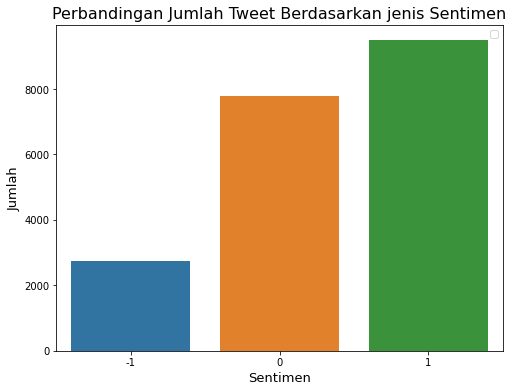

In [ ]:
# Perbandingan Jumlah Tweet Berdasarkan Jenis Sentimen
plt.figure(figsize=(8,6)) 
p = sns.countplot(x="Sentimen", data=table3)
plt.title("Perbandingan Jumlah Tweet Berdasarkan jenis Sentimen", fontsize = 16)
plt.xlabel("Sentimen", fontsize=13)
plt.ylabel("Jumlah", fontsize = 13)
plt.legend()